In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('TITANIC.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Variable Identification

dependent variable is Survived

rest of them are independent variables

## Univariate Analysis

### 1. Categorical variables

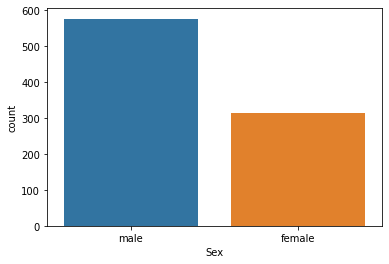

In [6]:
sns.countplot(x='Sex',data=df)

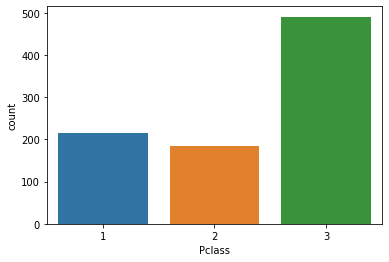

In [7]:
sns.countplot(x='Pclass',data=df)

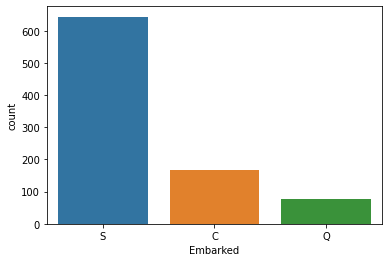

In [8]:
sns.countplot(x='Embarked',data=df)

### 2.Numerical variables 

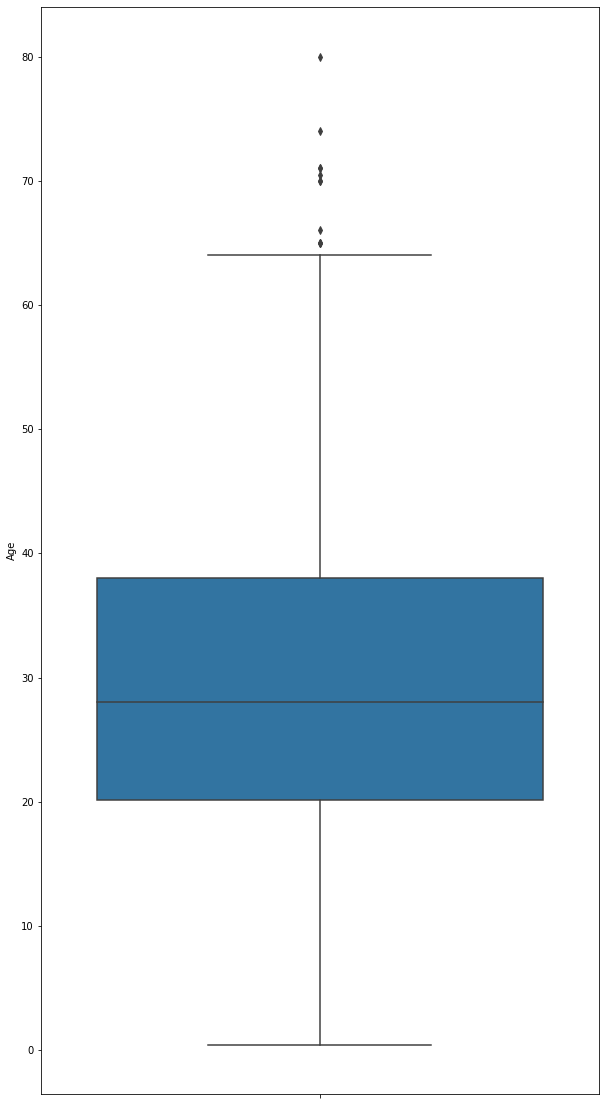

In [9]:
plt.figure(figsize=(10,20))
sns.boxplot(y='Age',data=df)

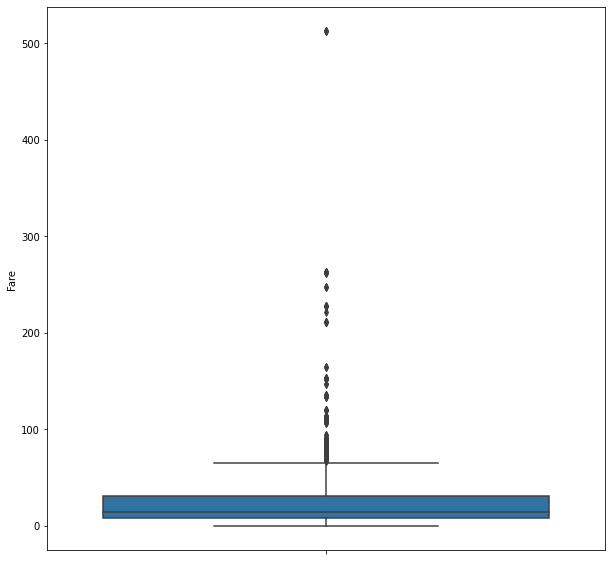

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(y='Fare',data=df)

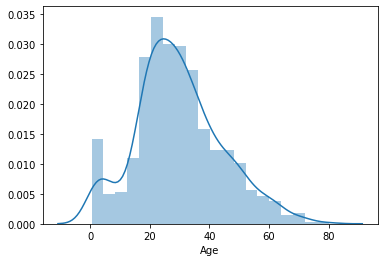

In [11]:
sns.distplot(df['Age'],bins=20)

 The AGE distribution is rightly skewed

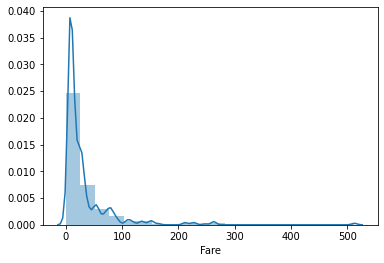

In [12]:
sns.distplot(df['Fare'],bins=20)

###  3.Discreete Variables

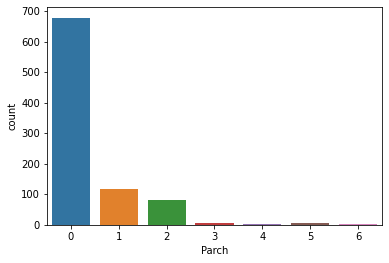

In [13]:
sns.countplot(x='Parch',data=df)

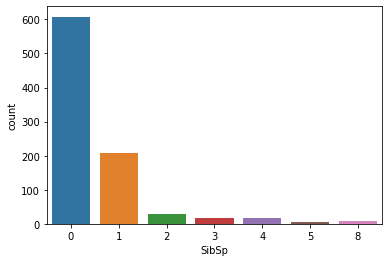

In [14]:
sns.countplot(x='SibSp',data=df)

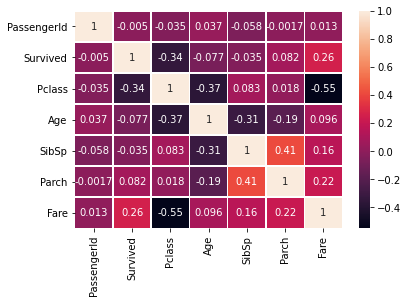

In [15]:
sns.heatmap(df.corr(),annot=True, linewidth=0.5)

## Bivariate Analysis

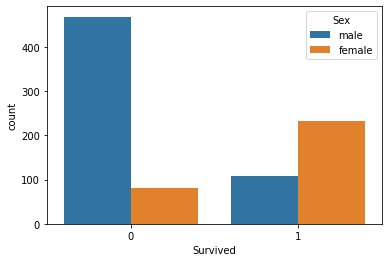

In [16]:
sns.countplot(x='Survived',hue='Sex',data=df)

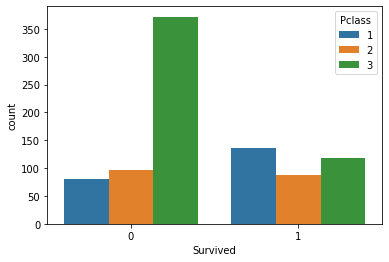

In [17]:
sns.countplot(x='Survived',hue='Pclass',data=df)

We can see that most of the people who didn't survive were from the 3 class

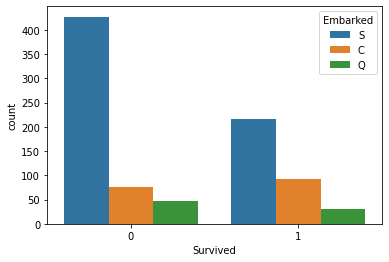

In [18]:
sns.countplot(x='Survived',hue='Embarked',data=df)

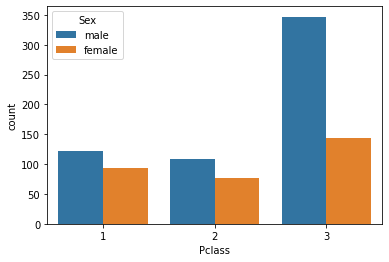

In [19]:
sns.countplot(x='Pclass',hue='Sex',data=df)

More number of passengers belonged to class 3

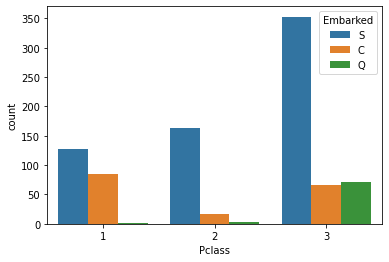

In [20]:
sns.countplot(x='Pclass',hue='Embarked',data=df)

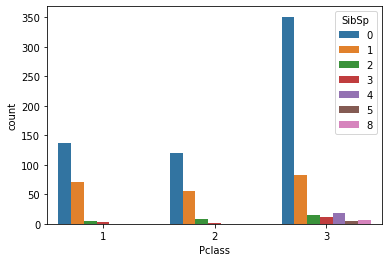

In [21]:
sns.countplot(x='Pclass',hue='SibSp',data=df)

 People of class 3 had more number of siblings or spouses

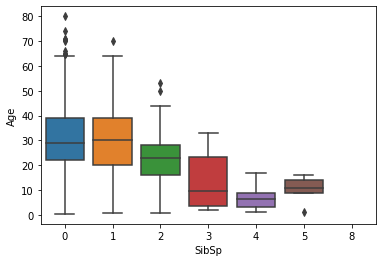

In [22]:
sns.boxplot(y='Age',x='SibSp',data=df)

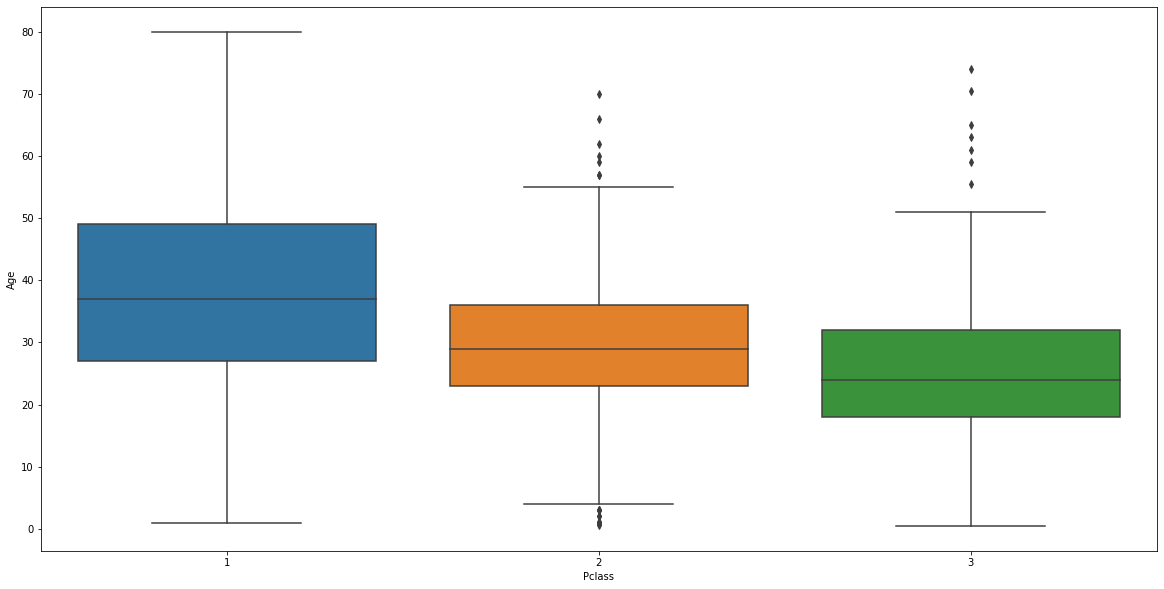

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Pclass',y='Age',data=df)

### Average Age for each class
    pclass_1 : 37
    pclass_2 : 28
    pclass_3 : 24

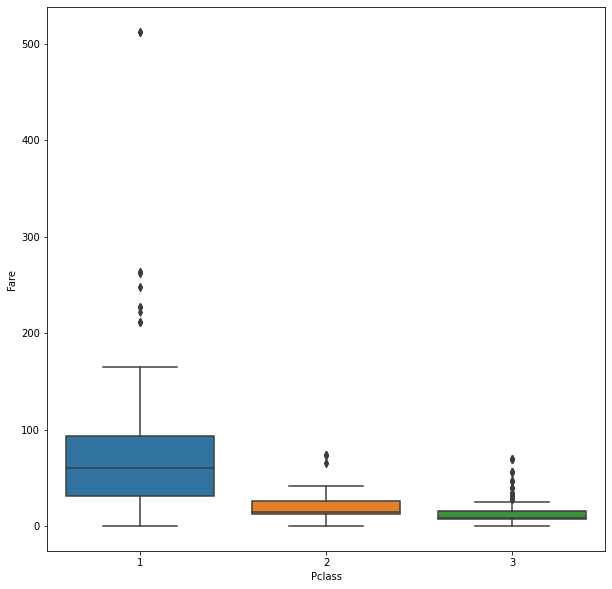

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Fare',data=df)

As the class number increases the fare value decreases

## Missing Values treatment

In [25]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
df['Age'].isnull().sum()

177

In [27]:
df['Age']=df['Age'].fillna(value=df['Age'].median())

In [28]:
df['Age'].isnull().sum()

0

In [29]:
#Removing all variables that aren't needed
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [30]:
#Removing rows that have nan values for embarked
df.dropna(subset=['Embarked'],inplace=True)

## Outlier Values treatment

In [31]:
df['Age']=df['Age'].astype(int)

In [32]:

IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
print(IQR)

13.0


In [33]:
UQ=df['Age'].quantile(0.75)+1.5*IQR
LQ=df['Age'].quantile(0.25)-1.5*IQR
print(UQ)
print(LQ)

54.5
2.5


In [34]:
Outliervalues=df[(df['Age']>=UQ)|(df['Age']<=LQ)]
Outliervalues['Age']

7       2
11     58
15     55
16      2
33     66
       ..
824     2
827     1
831     0
851    74
879    56
Name: Age, Length: 65, dtype: int32

In [35]:
for i in Outliervalues.index:
    if df['Age'][i]>=UQ:
        df['Age'][i]=df['Age'].quantile(0.95)
    elif df['Age'][i]<=LQ:
        df['Age'][i]=df['Age'].quantile(0.5)
    else:
        df['Age'][i]=df['Age']

C:\Users\aamir\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\aamir\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Feature Engineering

In [36]:
#categorical variables are Sex,Pclass,Embarked
#Creating dummy variables for these variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 99.0+ KB


In [37]:
obj=df.dtypes==np.object
print(obj)

Survived    False
Pclass      False
Sex          True
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool


In [38]:
dfdummy=pd.DataFrame()
for i in df.columns[obj]:
    dummy=pd.get_dummies(df[i],drop_first=True)
    dfdummy=pd.concat([dfdummy,dummy],axis=1)
print(dfdummy)    

     male  Q  S
0       1  0  1
1       0  0  0
2       0  0  1
3       0  0  1
4       1  0  1
..    ... .. ..
886     1  0  1
887     0  0  1
888     0  0  1
889     1  0  0
890     1  1  0

[889 rows x 3 columns]


In [39]:
df1=pd.concat([df,dfdummy],axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22,1,0,7.2500,S,1,0,1
1,1,1,female,38,1,0,71.2833,C,0,0,0
2,1,3,female,26,0,0,7.9250,S,0,0,1
3,1,1,female,35,1,0,53.1000,S,0,0,1
4,0,3,male,35,0,0,8.0500,S,1,0,1


In [40]:
df1.drop(['Sex','Embarked'],axis=1,inplace=True)

In [41]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


In [42]:
dfdum=pd.get_dummies(df['Pclass'],drop_first=True)
print(dfdum)

     2  3
0    0  1
1    0  0
2    0  1
3    0  0
4    0  1
..  .. ..
886  1  0
887  0  0
888  0  1
889  0  0
890  0  1

[889 rows x 2 columns]


In [43]:
df1=pd.concat([df1,dfdum],axis=1)
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22,1,0,7.2500,1,0,1,0,1
1,1,1,38,1,0,71.2833,0,0,0,0,0
2,1,3,26,0,0,7.9250,0,0,1,0,1
3,1,1,35,1,0,53.1000,0,0,1,0,0
4,0,3,35,0,0,8.0500,1,0,1,0,1


In [44]:
df1.drop(['Pclass'],axis=1,inplace=True)
df1.rename(columns={2:'Pclass_2',
                    3:'Pclass_3'}, 
                 inplace=True)
df1.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,Pclass_2,Pclass_3
0,0,22,1,0,7.2500,1,0,1,0,1
1,1,38,1,0,71.2833,0,0,0,0,0
2,1,26,0,0,7.9250,0,0,1,0,1
3,1,35,1,0,53.1000,0,0,1,0,0
4,0,35,0,0,8.0500,1,0,1,0,1


In [45]:
df1.to_csv('titanic1.csv')